In [13]:
import torch
import torch.nn.functional as F 


import matplotlib.pyplot as plt

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

1:06:00 into the video

In [5]:
# Create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix1)
    # N[ix1, ix2] += 1

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [6]:
xs

tensor([ 0,  5, 13, 13,  1])

In [8]:
ys

tensor([ 0,  5, 13, 13,  1])

In [16]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

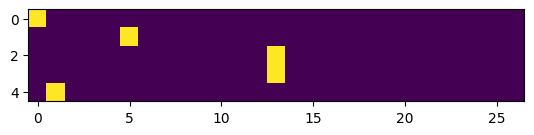

In [17]:
plt.imshow(xenc);

In [22]:
# @ this is a matrix multiplication operator in pytorch

W = torch.randn((27, 27))
xenc @ W  

tensor([[-0.5065, -1.6001,  0.1543, -1.5038,  0.6003,  0.1293,  0.3801,  0.9329,
         -0.1734,  1.0973, -0.7667, -0.4664, -1.5550,  0.6321, -0.8354, -1.0189,
          0.9538,  1.0722, -0.1760,  1.7314, -0.5848,  0.6770, -0.1518,  0.4151,
         -1.7621, -0.8457,  1.6124],
        [-0.0786,  0.4371,  1.6178,  0.8398, -1.1630,  0.5914, -0.7581, -0.9462,
         -0.8864,  0.0635, -0.2182, -1.1287, -1.6756,  0.8278, -0.3998, -0.3225,
          1.6548,  0.9399, -0.0143,  0.5533,  0.1249,  1.9361,  0.8274, -1.9637,
         -0.0043,  0.2374, -0.3217],
        [ 0.0624, -0.8057,  0.7439,  0.0466, -0.3992,  0.2192,  0.1475, -0.5697,
         -0.5436,  1.0771, -0.9591,  1.6696, -1.1074, -0.3922, -1.1530,  1.6938,
         -0.6793,  1.5330, -0.1629,  0.3364, -0.3267, -0.3821, -1.7494, -1.2651,
          0.3915, -0.9126, -0.5953],
        [ 0.0624, -0.8057,  0.7439,  0.0466, -0.3992,  0.2192,  0.1475, -0.5697,
         -0.5436,  1.0771, -0.9591,  1.6696, -1.1074, -0.3922, -1.1530,  1.6938

In [25]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0153, 0.0051, 0.0295, 0.0056, 0.0462, 0.0288, 0.0370, 0.0644, 0.0213,
         0.0759, 0.0118, 0.0159, 0.0053, 0.0476, 0.0110, 0.0091, 0.0657, 0.0740,
         0.0212, 0.1430, 0.0141, 0.0498, 0.0218, 0.0383, 0.0043, 0.0109, 0.1270],
        [0.0214, 0.0358, 0.1165, 0.0535, 0.0072, 0.0417, 0.0108, 0.0090, 0.0095,
         0.0246, 0.0186, 0.0075, 0.0043, 0.0529, 0.0155, 0.0167, 0.1209, 0.0591,
         0.0228, 0.0402, 0.0262, 0.1602, 0.0529, 0.0032, 0.0230, 0.0293, 0.0167],
        [0.0296, 0.0124, 0.0585, 0.0291, 0.0187, 0.0346, 0.0322, 0.0157, 0.0161,
         0.0817, 0.0107, 0.1477, 0.0092, 0.0188, 0.0088, 0.1513, 0.0141, 0.1288,
         0.0236, 0.0389, 0.0201, 0.0190, 0.0048, 0.0078, 0.0411, 0.0112, 0.0153],
        [0.0296, 0.0124, 0.0585, 0.0291, 0.0187, 0.0346, 0.0322, 0.0157, 0.0161,
         0.0817, 0.0107, 0.1477, 0.0092, 0.0188, 0.0088, 0.1513, 0.0141, 0.1288,
         0.0236, 0.0389, 0.0201, 0.0190, 0.0048, 0.0078, 0.0411, 0.0112, 0.0153],
        [0.0082, 0.0309,

In [28]:
probs.shape

torch.Size([5, 27])

In [29]:
# SUMMARY ------------------>>>>

In [31]:
xs

tensor([ 0,  5, 13, 13,  1])

In [32]:
ys

tensor([ 0,  5, 13, 13,  1])

In [30]:
# randomly initialize 27 neuros's weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [33]:
xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding 
logits = xenc @ W # predict log-counts 
counts = logits.exp() # counts, equivalent to N 
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 
# btw: the last 2 lines here are together called a "softmax"

In [34]:
probs.shape

torch.Size([5, 27])

In [39]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .. (indexes 0,0)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 0
probability assigned by the net to the the correct character: 0.06067225709557533
log likelihood: -2.8022687435150146
negative log likelihood: 2.8022687435150146
--------
bigram example 2: ee (indexes 5,5)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.

In [38]:
# ------------- !!! OPTIMIZATION !!! ---------------

In [54]:
# randomly initialize 27 neuros's weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [68]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding 
logits = xenc @ W # predict log-counts 
counts = logits.exp() # counts, equivalent to N 
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 
loss = -probs[torch.arange(5), ys].log().mean()

In [69]:
print(loss.item())

3.6122443675994873


In [66]:
# Backward pass
W.grad = None 
loss.backward()

In [67]:
# Update to the tensor
W.data += -0.1 * W.grad

In [70]:
# ----------- Putting it all together -------------------

In [78]:
# Create the training set of bigrams (x,y)
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    #print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix1)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the "network"
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples:  228146


In [79]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding 
    logits = xenc @ W # predict log-counts 
    counts = logits.exp() # counts, equivalent to N 
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None 
    loss.backward()

    # update
    W.data += -50 * W.grad    

3.7305312156677246
1.0994595289230347
0.591590940952301
0.3783233165740967
0.2760242521762848
0.21673227846622467
0.17668212950229645
0.14805859327316284
0.12695103883743286
0.11091091483831406
0.09834054857492447
0.08820056915283203
0.07981247454881668
0.07272743433713913
0.06664177775382996
0.06134545058012009
0.056689005345106125
0.052563346922397614
0.048886414617300034
0.04559497535228729
0.04263840615749359
0.03997547924518585
0.037571411579847336
0.03539661690592766
0.03342510014772415
0.03163433074951172
0.03000427968800068
0.02851726859807968
0.027157675474882126
0.025911647826433182
0.02476702444255352
0.023712987080216408
0.022740010172128677
0.02183980867266655
0.02100490592420101
0.020228860899806023
0.019505925476551056
0.01883106119930744
0.018199801445007324
0.017608141526579857
0.01705247536301613
0.016529791057109833
0.016037285327911377
0.015572436153888702
0.015133005566895008
0.01471701916307211
0.01432262733578682
0.013948258943855762
0.013592429459095001
0.013253

In [80]:
W.data

tensor([[ 1.0233e+01, -3.4948e-01, -1.6471e-01, -1.1490e+00,  1.0075e-01,
         -1.6667e-01, -1.5781e+00,  3.5507e-01, -7.2939e-02,  5.7525e-01,
         -5.6067e-01,  4.9117e-01, -4.3115e-01, -5.2578e-01,  8.7152e-01,
          1.0755e+00,  9.7041e-01, -1.6548e+00,  4.1000e-01, -9.0273e-01,
          6.3053e-01, -2.7062e-01, -1.5127e+00,  2.3252e-01, -2.0246e-01,
          1.2013e+00,  1.2035e+00],
        [-8.5792e-01,  9.5897e+00, -1.5308e-01, -1.2006e+00,  7.0558e-02,
         -3.1374e-01,  2.5057e-01, -9.6801e-01, -1.0088e+00, -1.8696e+00,
          2.4092e-01, -1.3362e+00,  2.3387e-01, -1.1068e+00, -5.1434e-01,
         -6.0140e-01, -1.3564e-01, -1.4266e+00,  2.1184e-01,  8.4792e-03,
         -6.3815e-02, -3.1179e-01, -1.8071e+00, -2.7091e-01,  1.0313e-01,
         -1.9686e-02, -1.2819e+00],
        [-6.4292e-02, -1.0726e+00,  7.3075e+00,  1.9019e-01, -9.8884e-01,
         -8.7184e-01, -7.4415e-02, -3.6398e-01, -1.1099e+00, -1.5795e+00,
          5.1751e-01, -9.6370e-01,  9.66